In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("C:\\Users\\Admin\\Desktop\\SOP data.xlsx")
import re
def conve(x):
 return re.findall(r'\d+',x)[0]
df["size"]=df['Size'].apply(conve)
df = df.astype({'size':'int'})
df["event"]=df['Event'].apply(conve)
df = df.astype({'event':'int'})
df=df[['Time','event','size','Name','from']]
df1=df.groupby('event').first()
df=df[df['Name']=='sourcePacket']
df2=df1[df1['from']=='src[0]']
ts=df2[['size']]
ts

,size
event,
5,908
127,734
248,813
355,1165
498,583
...,...
116016,576
116095,592
116167,537


In [ ]:
ts['diff']=0

In [3]:
arr = ts['size'].values
window_size = 2
 
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
 
# Loop through the array to consider
# every window of size 3
while i < len(arr) - window_size + 1:
   # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
 # Calculate the average of current window
    window_average = (sum(window) / window_size)
     
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
     
    # Shift window to right by one position
    i += 1


In [4]:
average_value = np.mean(moving_averages)
average_value

1114.9201550387597

In [5]:

for i in range(1):
    moving_averages= np.append(moving_averages, average_value)
    
 

In [6]:
df = pd.DataFrame({'actual_size': arr, 'MA': moving_averages})
df

,actual_size,MA
0,908,821.000000
1,734,773.500000
2,813,989.000000
3,1165,874.000000
4,583,4435.000000
...,...,...
641,576,584.000000
642,592,564.500000
643,537,565.000000
644,593,1171.000000


In [7]:
df['per']=(df['MA']-df['actual_size'])/df['actual_size']
df['per'].mean()

0.4167760127148655

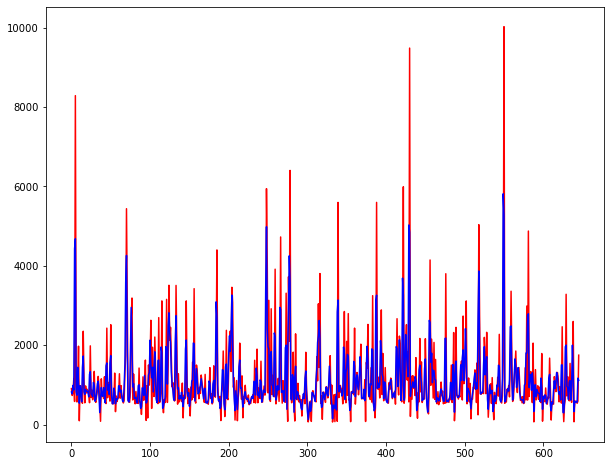

In [8]:
plt.figure(figsize=(10,8)) 
plt.plot(ts['size'].values,color='red')
plt.plot(moving_averages,color='blue')
plt.show()

In [10]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
r2=r2_score(df['actual_size'],df['MA'])
mae=mean_absolute_error(df['actual_size'],df['MA'])
mse=mean_squared_error(df['actual_size'],df['MA'])
print("r2_score",r2 ,"MAE" ,mae,"MSE",mse)

r2_score 0.5094190382110217 MAE 432.81513907888734 MSE 548521.9264702571


In [11]:
import pmdarima as pm

In [12]:
model = pm.auto_arima(moving_averages, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11144.415, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10331.467, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=10327.262, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=10186.880, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=10188.678, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=10089.460, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10126.374, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=10069.189, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=10050.770, Time=0.15 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Ti

In [13]:
train_set=ts.iloc[0:550]
test_set=ts.iloc[550:]

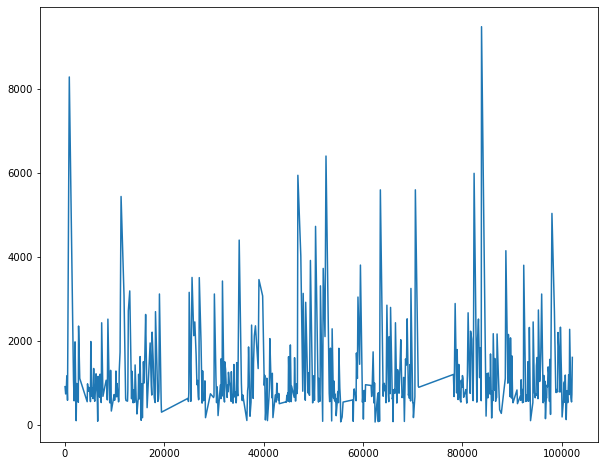

In [14]:

plt.figure(figsize=(10,8)) 
plt.plot(train_set)
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(moving_averages, order=(5,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  646
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -5018.378
Date:                Thu, 02 May 2024   AIC                          10050.756
Time:                        15:40:47   BIC                          10082.051
Sample:                             0   HQIC                         10062.898
                                - 646                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1114.9202     67.112     16.613      0.000     983.383    1246.457
ar.L1          0.8482      0.036     23.789      0.000       0.778       0.918
ar.L2         -0.6710      0.042    -16.064      0.0

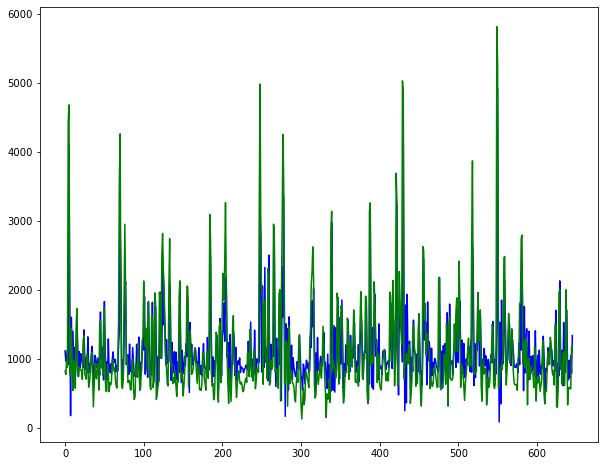

In [16]:
plt.figure(figsize=(10,8)) 
plt.plot(model_fit.fittedvalues, color='blue')
plt.plot(moving_averages, color='green')
plt.show()

In [62]:
# Program to calculate moving average
arr = train_set.values
window_size = 3
 
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
 
# Loop through the array to consider
# every window of size 3
while i < len(arr) - window_size + 1:
   # Store elements from i to i+window_size
    # in list to get the current window
    window = arr[i : i + window_size]
 # Calculate the average of current window
    window_average = (sum(window) / window_size)
     
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
     
    # Shift window to right by one position
    i += 1
print(moving_averages)


[array([818.33333333]), array([904.]), array([853.66666667]), array([3345.]), array([3315.]), array([3310.66666667]), array([852.33333333]), array([1152.33333333]), array([994.66666667]), array([1018.33333333]), array([684.]), array([856.]), array([707.]), array([1167.]), array([1330.66666667]), array([1335.]), array([876.]), array([774.]), array([887.66666667]), array([828.33333333]), array([844.66666667]), array([732.]), array([1127.66666667]), array([1072.66666667]), array([1179.]), array([726.33333333]), array([760.66666667]), array([917.33333333]), array([914.66666667]), array([839.66666667]), array([633.33333333]), array([709.33333333]), array([927.33333333]), array([1012.]), array([904.66666667]), array([528.]), array([587.]), array([651.33333333]), array([878.]), array([712.33333333]), array([875.]), array([808.]), array([766.]), array([1174.33333333]), array([1212.33333333]), array([1389.33333333]), array([889.33333333]), array([861.]), array([1346.33333333]), array([1355.3333